In [22]:
import pandas as pd
from patsy.desc import test_ModelDesc_from_formula
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import seaborn as sns

# 여성 편향 데이터

In [23]:
# 1. 데이터 불러오기
df = pd.read_csv('titanic_train_female_large.csv')
data_df = df
data_df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,3,"Zakarian, Mr. Ortin",1,27.0,0,0,2670,7.2250,NaN,C,0
1,3,"Zabour, Miss. Hileni",0,14.5,1,0,2665,14.4542,NaN,C,0
2,1,"Young, Miss. Marie Grice",0,36.0,0,0,PC 17760,135.6333,C32,C,1
3,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",0,15.0,1,0,2659,14.4542,NaN,C,1
4,2,"Wright, Miss. Marion",0,26.0,0,0,220844,13.5000,NaN,S,1


In [24]:
data_df.shape

(377, 11)

survived
1    253
0    124
Name: count, dtype: int64


<Axes: xlabel='survived'>

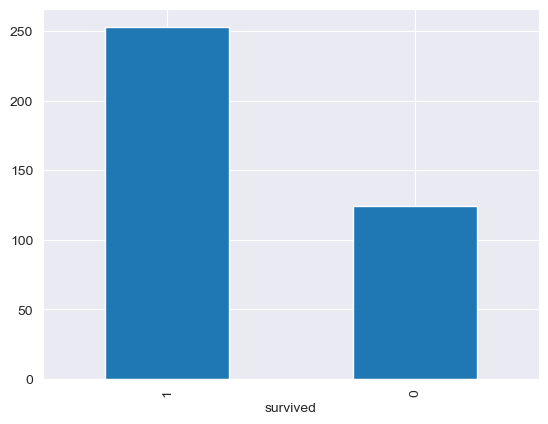

In [25]:
data_df['age'] = (data_df['age']//10)*10
print(data_df['survived'].value_counts())
data_df['survived'].value_counts().plot(kind='bar')

In [26]:
test = pd.read_csv('test.csv')
train = data_df
print(train.shape)
print(test.shape)

(377, 11)
(210, 11)


In [27]:
test['age'] = (test['age']//10)*10

survived
1    253
0    124
Name: count, dtype: int64


<Axes: xlabel='survived'>

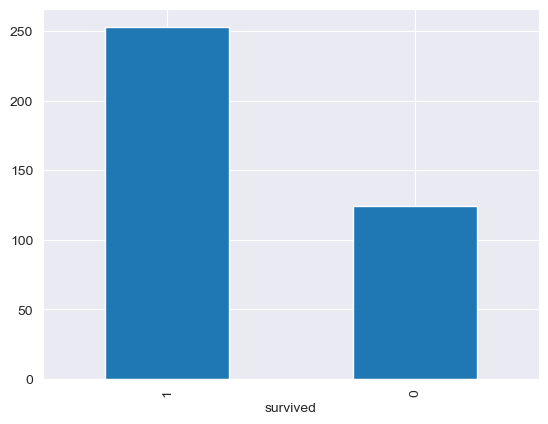

In [28]:
data_df.corr(numeric_only=True)
# train data 생존자 비율
print(train['survived'].value_counts())
train['survived'].value_counts().plot(kind='bar')

pclass
3    148
1    130
2     99
Name: count, dtype: int64


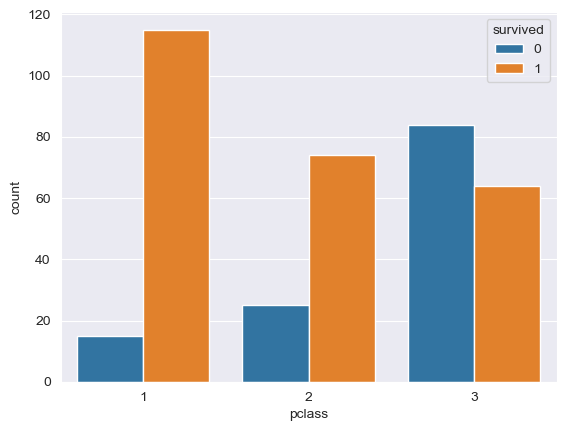

In [29]:
#클래스별 생존자 비율
print(train['pclass'].value_counts())
ax = sns.countplot(x='pclass', hue='survived', data=train)

age
20.0    112
30.0     87
10.0     57
40.0     48
0.0      35
50.0     27
60.0     10
70.0      1
Name: count, dtype: int64


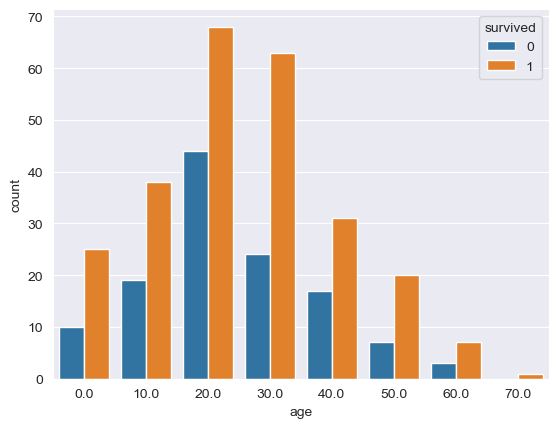

In [30]:
#연령별 생존자 비율
print(train['age'].value_counts())
ax = sns.countplot(x='age', hue='survived', data=train)

In [31]:
train.groupby(['pclass','age']).mean(numeric_only=True)

sex     sibsp     parch        fare  survived
pclass age                                                     
1      0.0   0.500000  0.500000  2.000000  143.025000  0.500000
       10.0  0.000000  0.500000  0.750000   93.972917  1.000000
       20.0  0.160000  0.520000  0.600000  104.317168  0.920000
       30.0  0.078947  0.368421  0.210526  116.880703  0.921053
       40.0  0.260870  0.391304  0.391304   85.450726  0.826087
       50.0  0.095238  0.666667  0.380952  105.332733  0.857143
       60.0  0.125000  0.500000  1.000000  111.339587  0.750000
       70.0  0.000000  1.000000  0.000000   78.850000  1.000000
2      0.0   0.000000  0.800000  1.500000   31.040840  1.000000
       10.0  0.142857  0.357143  0.428571   21.737200  0.785714
       20.0  0.171429  0.571429  0.428571   21.922977  0.714286
       30.0  0.136364  0.363636  0.363636   18.431250  0.772727
       40.0  0.090909  0.454545  0.727273   26.113636  0.818182
       50.0  0.500000  0.000000  0.166667   14.583333  0.333333
       60.0  0.000000  1.000000  0.000000   26.000000  0.000000
3      0.0   0.043478  1.521739  1.217391   19.188217  0.608696
       10.0  0.032258  0.806452  0.451613   13.526348  0.483871
       20.0  0.211538  0.230769  0.384615   11.738300  0.384615
       30.0  0.111111  0.555556  0.888889   13.909722  0.407407
       40.0  0.214286  0.571429  1.214286   16.696429  0.214286
       60.0  0.000000  0.000000  0.000000    9.587500  1.000000

In [32]:
train_data_df = train[['pclass','age']]
train_data_df.head()

,pclass,age
0,3,20.0
1,3,10.0
2,1,30.0
3,3,10.0
4,2,20.0


In [33]:
train_label_df = train[['survived']]
train_label_df.head()

,survived
0,0
1,0
2,1
3,1
4,1


In [34]:
train_data = train_data_df.values
train_data

array([[ 3., 20.],
       [ 3., 10.],
       [ 1., 30.],
       [ 3., 10.],
       [ 2., 20.],
       [ 1., 30.],
       [ 3., 40.],
       [ 1., 50.],
       [ 1., 30.],
       [ 1., 50.],
       [ 3., 30.],
       [ 2., 30.],
       [ 2.,  0.],
       [ 2.,  0.],
       [ 2., 20.],
       [ 2., 30.],
       [ 2., 40.],
       [ 2., 10.],
       [ 1., 30.],
       [ 2., 30.],
       [ 3., 10.],
       [ 3., 30.],
       [ 3., 10.],
       [ 3., 20.],
       [ 3., 30.],
       [ 3., 10.],
       [ 1., 40.],
       [ 2., 20.],
       [ 3., 60.],
       [ 1., 30.],
       [ 2., 20.],
       [ 2., 20.],
       [ 3., 20.],
       [ 3.,  0.],
       [ 3., 10.],
       [ 1., 30.],
       [ 1., 30.],
       [ 1., 50.],
       [ 1., 10.],
       [ 1., 40.],
       [ 3.,  0.],
       [ 1., 60.],
       [ 1., 60.],
       [ 1., 50.],
       [ 1., 40.],
       [ 3., 20.],
       [ 1., 40.],
       [ 1.,  0.],
       [ 3., 30.],
       [ 1., 20.],
       [ 1., 10.],
       [ 2., 40.],
       [ 1.,

In [35]:
train_label = train_label_df.values.ravel()
train_label

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,

In [36]:
test_data_df = test[['pclass','age']]
test_data_df.head()

,pclass,age
0,2,20.0
1,3,20.0
2,2,30.0
3,3,30.0
4,2,20.0


In [37]:
test_label_df = test[['survived']]
test_label_df.head()

,survived
0,1
1,1
2,1
3,0
4,0


In [38]:
test_data = test_data_df.values
test_data

array([[ 2., 20.],
       [ 3., 20.],
       [ 2., 30.],
       [ 3., 30.],
       [ 2., 20.],
       [ 3., 20.],
       [ 3., 30.],
       [ 2., 40.],
       [ 3., 10.],
       [ 2., 40.],
       [ 3., 30.],
       [ 2., 30.],
       [ 2., 50.],
       [ 2., 20.],
       [ 3., 10.],
       [ 3., 20.],
       [ 3., 20.],
       [ 2., 20.],
       [ 1., 20.],
       [ 1., 40.],
       [ 3., 60.],
       [ 2., 20.],
       [ 1.,  0.],
       [ 3., 30.],
       [ 1., 30.],
       [ 1., 30.],
       [ 1., 60.],
       [ 3.,  0.],
       [ 3., 20.],
       [ 1., 20.],
       [ 1., 30.],
       [ 1., 40.],
       [ 1., 40.],
       [ 3., 10.],
       [ 1., 40.],
       [ 3., 10.],
       [ 1., 40.],
       [ 2., 20.],
       [ 2., 20.],
       [ 3., 10.],
       [ 3., 10.],
       [ 2., 10.],
       [ 1., 20.],
       [ 2., 20.],
       [ 3.,  0.],
       [ 2., 50.],
       [ 3., 20.],
       [ 3., 30.],
       [ 3., 20.],
       [ 3., 30.],
       [ 1., 10.],
       [ 1., 50.],
       [ 2.,

In [39]:
test_label = test_label_df.values.ravel()
test_label

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1])

In [40]:
clf = svm.SVC(C=1, gamma=0.1)
clf.fit(train_data,train_label)

pred_svm = clf.predict(test_data)
test['survived_predict'] = pred_svm
test

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived,survived_predict
0,2,"Laroche, Mrs. Joseph (Juliette Marie Louise La...",0,20.0,1,2,SC/Paris 2123,41.5792,NaN,C,1,1
1,3,"Buckley, Mr. Daniel",1,20.0,0,0,330920,7.8208,NaN,Q,1,0
2,2,"Ware, Mrs. John James (Florence Louise Long)",0,30.0,0,0,CA 31352,21.0000,NaN,S,1,1
3,3,"Connaghton, Mr. Michael",1,30.0,0,0,335097,7.7500,NaN,Q,0,1
4,2,"Laroche, Mr. Joseph Philippe Lemercier",1,20.0,1,2,SC/Paris 2123,41.5792,NaN,C,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
205,2,"Becker, Master. Richard F",1,0.0,2,1,230136,39.0000,F4,S,1,1
206,2,"Harbeck, Mr. William H",1,40.0,0,0,248746,13.0000,NaN,S,0,1
207,3,"Duane, Mr. Frank",1,60.0,0,0,336439,7.7500,NaN,Q,0,1
208,3,"Johansson, Mr. Gustaf Joel",1,30.0,0,0,7540,8.6542,NaN,S,0,1


pclass
3    102
2     56
1     52
Name: count, dtype: int64


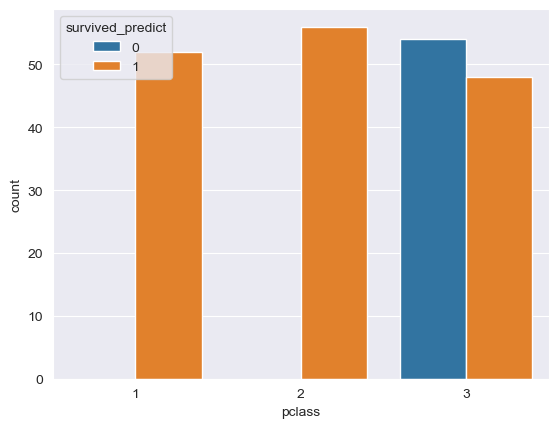

In [41]:
print(test['pclass'].value_counts())
ax = sns.countplot(x='pclass', hue='survived_predict', data=test)

sex
1    148
0     62
Name: count, dtype: int64


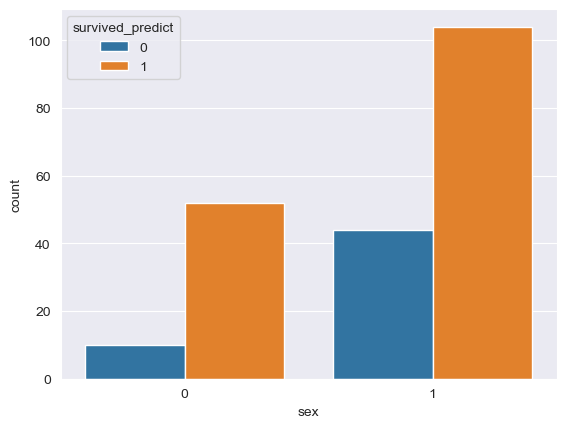

In [42]:
print(test['sex'].value_counts())
ax = sns.countplot(x='sex',hue='survived_predict',data=test)

age
20.0    76
30.0    40
10.0    26
40.0    25
0.0     20
50.0    14
60.0     7
70.0     2
Name: count, dtype: int64


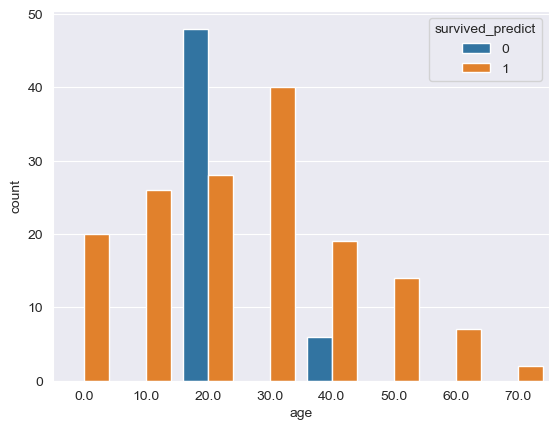

In [43]:
print(test['age'].value_counts())
ax = sns.countplot(x='age',hue='survived_predict',data=test)

In [44]:
test.groupby(['pclass','sex']).mean(numeric_only=True)

age     sibsp     parch        fare  survived  \
pclass sex                                                        
1      0    30.000000  0.750000  0.500000  114.252300  1.000000   
       1    36.250000  0.281250  0.343750   89.616800  0.187500   
2      0    26.842105  0.473684  1.000000   25.384211  0.947368   
       1    24.864865  0.513514  0.351351   21.826127  0.243243   
3      0    14.782609  0.826087  0.869565   15.277000  0.521739   
       1    21.645570  0.708861  0.278481   12.980115  0.139241   

            survived_predict  
pclass sex                    
1      0            1.000000  
       1            1.000000  
2      0            1.000000  
       1            1.000000  
3      0            0.565217  
       1            0.443038

In [45]:

print(f'실제 생존한 여성 수 : {len(test_label)}/{test_label.sum()}\n편향된 데이터로 예측한 여성 생존자수: {len(test_label)}/{test["survived_predict"].sum()}')

실제 생존한 여성 수 : 210/76
편향된 데이터로 예측한 여성 생존자수: 210/156
